In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os.path as op

In [3]:
from AFQ import api

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
import AFQ.data as afd
import AFQ.viz as afv

In [5]:
afd.organize_stanford_data()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/stanford_hardi 


In [6]:
base_dir = op.join(op.expanduser('~'), 'AFQ_data', 'stanford_hardi')

In [7]:
op.join(afd.afq_home, 'stanford_hard')

'/Users/arokem/AFQ_data/stanford_hard'

In [8]:
myafq = api.AFQ(preproc_path=op.join(afd.afq_home, 'stanford_hardi'), sub_prefix='sub',
               wm_labels=[1, 2])

In [9]:
myafq.data_frame

,anat_file,bval_file,bvec_file,dwi_file,seg_file,sess,subject,gtab,dwi_affine
0,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,sub-01,<dipy.core.gradients.GradientTable object at 0...,"[[2.0, 0.0, 0.0, -80.0], [0.0, 2.0, 0.0, -120...."


In [10]:
myafq.brain_mask

0    /Users/arokem/AFQ_data/stanford_hardi/sub-01/s...
Name: brain_mask_file, dtype: object

In [11]:
import nibabel as nib

In [12]:
dti_img = nib.load(myafq.dti[0])
dti_data = dti_img.get_data()

In [13]:
myafq['gtab']

0    <dipy.core.gradients.GradientTable object at 0...
Name: gtab, dtype: object

In [17]:
from importlib import reload
reload(afv)

<module 'AFQ.viz' from '/Users/arokem/source/pyAFQ/AFQ/viz.py'>

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


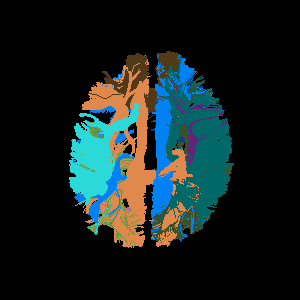

In [29]:
ren = afv.visualize_bundles(myafq.bundles[0], interact=True)

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv(myafq.tract_profiles[0])

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/AFQ_data/templates 


In [21]:
df.bundle.unique()

array(['ATR_R', 'ATR_L', 'CGC_R', 'CGC_L', 'CST_R', 'CST_L', 'HCC_L',
       'IFO_R', 'IFO_L', 'ILF_R', 'ILF_L', 'SLF_R', 'SLF_L', 'ARC_R',
       'UNC_R', 'UNC_L', 'FA', 'FP'], dtype=object)

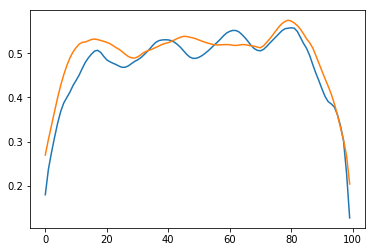

In [42]:
plt.plot(range(100), df[(df['scalar'] == "dti_fa") & (df['bundle']=="SLF_L")]['profiles'])
plt.plot(range(100), df[(df['scalar'] == "dti_fa") & (df['bundle']=="SLF_R")]['profiles'])